In [41]:
import numpy as np 
import pandas as pd 
import datetime
import os

from matplotlib import pyplot as plt


In [42]:
df_covid_19 = pd.read_csv("covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_covid_19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [43]:
df_sars_03 = pd.read_csv("sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)

In [44]:
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
df = df.reset_index(drop=True)

In [45]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])

In [46]:
df = df.groupby(['Outbreak','Country/Region','Province/State','Date']).agg({'Confirmed':'sum'}).reset_index()
df['Province/State'] = 'all'

In [47]:
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] >0]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)

In [48]:
df['Country/Region'].value_counts()

US                 4294
Mainland China     3311
Canada             1015
France              710
Australia           709
                   ... 
 Azerbaijan           1
('St. Martin',)       1
Cape Verde            1
North Ireland         1
East Timor            1
Name: Country/Region, Length: 231, dtype: int64

In [49]:
country_data = pd.read_csv("countries of the world.csv")
country_data['Country'] = country_data['Country'].str.strip()
country_data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [50]:
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'

df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])
df.head

<bound method NDFrame.head of          Outbreak   Country/Region Province/State       Date  Confirmed  \
0      COVID_2019       Azerbaijan            all 2020-02-28        1.0   
1      COVID_2019  ('St. Martin',)            all 2020-03-10        2.0   
2      COVID_2019      Afghanistan            all 2020-02-24        1.0   
3      COVID_2019      Afghanistan            all 2020-02-25        1.0   
4      COVID_2019      Afghanistan            all 2020-02-26        1.0   
...           ...              ...            ...        ...        ...   
25040   SARS_2003          Vietnam            all 2003-07-07       63.0   
25041   SARS_2003          Vietnam            all 2003-07-08       63.0   
25042   SARS_2003          Vietnam            all 2003-07-09       63.0   
25043   SARS_2003          Vietnam            all 2003-07-10       63.0   
25044   SARS_2003          Vietnam            all 2003-07-11       63.0   

           Country                         Region  Population  Area (

In [51]:
df.loc[df['Country'].isnull()]['Country/Region'].value_counts()

Republic of Ireland               93
North Macedonia                   72
Bosnia and Herzegovina            64
Ivory Coast                       59
Republic of Korea                 59
Holy See                          59
Congo (Kinshasa)                  58
Macao SAR, China                  58
Antigua and Barbuda               56
Trinidad and Tobago               55
Eswatini                          55
Central African Republic          54
Congo (Brazzaville)               54
Montenegro                        52
Kosovo                            50
Cabo Verde                        49
Bahamas                           47
Gambia                            47
Timor-Leste                       47
Others                            46
Saint Kitts and Nevis             44
Diamond Princess                  44
West Bank and Gaza                43
MS Zaandam                        41
South Sudan                       33
Sao Tome and Principe             32
Russian Federation                31
S

In [52]:
df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'

In [53]:
df['Country'].value_counts()

United States     4388
China             3406
Undefined         1449
Canada            1015
France             710
                  ... 
Gambia, The          4
Bahamas, The         3
Cayman Islands       3
East Timor           1
Cape Verde           1
Name: Country, Length: 186, dtype: int64

## Normalisation

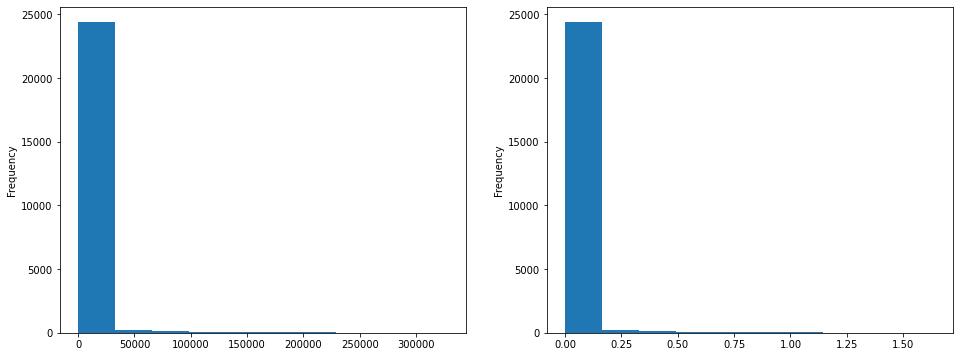

In [54]:
fix, ax = plt.subplots(figsize=(16,6), ncols=2)
s0 = df['Confirmed']
s0.plot.hist(ax=ax[0])

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler(feature_range=(0,1)).fit(np.asarray([0, 2E5]).reshape(-1,1)) 

s1 = pd.Series(transformer.transform(s0.values.reshape(-1,1)).reshape(-1))
s1.plot.hist(ax=ax[1])
df['Confirmed_transformed'] = s1 

### transforming date 

In [55]:
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

**Lags**

We use a 5-day-lag window to estimate the future development

In [56]:
n_lags = 5
for k,v in df.groupby(['Outbreak','Country/Region','Province/State']):    
    for d in range(n_lags,0,-1):                
        df.loc[v.index, f'Confirmed_Lag_{d}'] = v['Confirmed'].shift(d)
        df.loc[v.index, f'Confirmed_Transformed_Lag_{d}'] = v['Confirmed_transformed'].shift(d)

X_mask_lags = [c for c in df.columns if 'Confirmed_Lag_' in c]
X_mask_lags_transformed = [c for c in df.columns if 'Confirmed_Transformed_Lag_' in c]

df[X_mask_lags] = df[X_mask_lags].fillna(0)
df[X_mask_lags_transformed] = df[X_mask_lags_transformed].fillna(0)

print(f'Dataframe shape {df.shape}')

Dataframe shape (25045, 38)


Undefined       867
Hong Kong       203
Taiwan          202
China           202
Singapore       202
               ... 
Mali             44
Burma            42
Sierra Leone     38
Guadeloupe        9
Tajikistan        8
Name: Country, Length: 143, dtype: int64

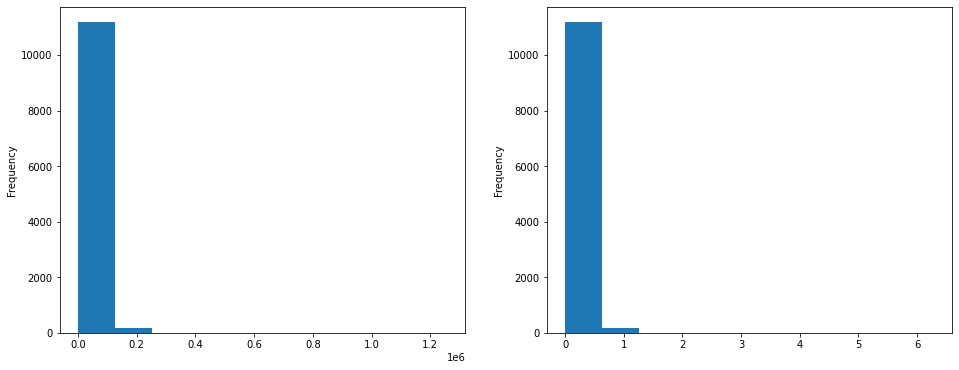

In [57]:
df_covid_19 = pd.read_csv("covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_sars_03 = pd.read_csv("sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = df.reset_index(drop=True)
df = df.groupby(['Outbreak','Country/Region','Province/State','Date']).agg({'Confirmed':'sum'}).reset_index()
df['Province/State'] = 'all'
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] > 50]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)
country_data = pd.read_csv("countries of the world.csv")
country_data['Country'] = country_data['Country'].str.strip()
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'

df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])
df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'
fix, ax = plt.subplots(figsize=(16,6), ncols=2)
s0 = df['Confirmed']
s0.plot.hist(ax=ax[0])

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler(feature_range=(0,1)).fit(np.asarray([0, 2E5]).reshape(-1,1))

s1 = pd.Series(transformer.transform(s0.values.reshape(-1,1)).reshape(-1))
s1.plot.hist(ax=ax[1])
df['Confirmed_transformed'] = s1 
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
n_lags = 5
for k,v in df.groupby(['Outbreak','Country/Region','Province/State']):    
    for d in range(n_lags,0,-1):                
        df.loc[v.index, f'Confirmed_Lag_{d}'] = v['Confirmed'].shift(d)
        
        df.loc[v.index, f'Confirmed_Transformed_Lag_{d}'] = v['Confirmed_transformed'].shift(d)

X_mask_lags = [c for c in df.columns if 'Confirmed_Lag_' in c]
X_mask_lags_transformed = [c for c in df.columns if 'Confirmed_Transformed_Lag_' in c]

df[X_mask_lags] = df[X_mask_lags].fillna(0)
df[X_mask_lags_transformed] = df[X_mask_lags_transformed].fillna(0)
df['Country'].value_counts()


In [58]:
from sklearn.preprocessing import LabelEncoder
enc_outb = LabelEncoder().fit(df['Outbreak'])
df['Outbreak_enc'] = enc_outb.transform(df['Outbreak'])

enc_ctry = LabelEncoder().fit(df['Country/Region'])
df['Country_enc'] = enc_ctry.transform(df['Country/Region'])

enc_region = LabelEncoder().fit(df['Region'])
df['Region_enc'] = enc_region.transform(df['Region'])

## Machine Learning with LGBM

In [59]:
from sklearn.model_selection import train_test_split

X_mask_cat = ['Outbreak_enc','Region_enc', 'Month','Week']
train_test = df.loc[df['Confirmed'] >0].copy()
s_unique_values = train_test[X_mask_lags].apply(lambda r: len(np.unique(r.values)), axis=1)
train_test = train_test.loc[s_unique_values > 1].copy()
print(f'Train/Test shape {train_test.shape}')

train, valid = train_test_split(train_test, test_size=0.2, shuffle=True, random_state=231451)

Train/Test shape (10162, 41)


In [60]:
from lightgbm import LGBMRegressor    
model_lgbm = LGBMRegressor(n_estimators=200, metric='mae', random_state=1234, min_child_samples=5, min_child_weight=0.000001)

print(f'Fitting on data with shape {train[X_mask_cat+X_mask_lags].shape} with validation of shape {valid[X_mask_cat+X_mask_lags].shape}')

model_lgbm.fit(X=train[X_mask_cat+X_mask_lags], y=train['Confirmed'], 
               eval_set=(valid[X_mask_cat+X_mask_lags], valid['Confirmed']),
               early_stopping_rounds=50, verbose=10)

Fitting on data with shape (8129, 9) with validation of shape (2033, 9)
Training until validation scores don't improve for 50 rounds
[10]	valid_0's l1: 5661.36
[20]	valid_0's l1: 2085.28
[30]	valid_0's l1: 905.164
[40]	valid_0's l1: 565.418
[50]	valid_0's l1: 470.635
[60]	valid_0's l1: 440.911
[70]	valid_0's l1: 428.061
[80]	valid_0's l1: 421.773
[90]	valid_0's l1: 419.096
[100]	valid_0's l1: 416.726
[110]	valid_0's l1: 414.57
[120]	valid_0's l1: 412.701
[130]	valid_0's l1: 411.435
[140]	valid_0's l1: 412.337
[150]	valid_0's l1: 413.066
[160]	valid_0's l1: 414.483
[170]	valid_0's l1: 415.468
[180]	valid_0's l1: 415.802
Early stopping, best iteration is:
[139]	valid_0's l1: 410.837


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              metric='mae', min_child_samples=5, min_child_weight=1e-06,
              min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
              objective=None, random_state=1234, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

Out-of-sample prediction with 28 steps (days)

In [61]:
from datetime import timedelta
pred_steps = 10

history = df.loc[(df['Outbreak']=='COVID_2019') & (df['Confirmed'] > 0) & (df['Country/Region']=='Tunisia')]
history0 = history.iloc[-1]

dt_rng = pd.date_range(start=history0['Date']+timedelta(days=1), 
                       end=history0['Date']+timedelta(days=pred_steps),freq='D').values
dt_rng = pd.to_datetime(dt_rng)

pred_months = pd.Series(dt_rng).apply(lambda dt: dt.month)
pred_weeks = pd.Series(dt_rng).apply(lambda dt: dt.week)

pred_cat = history0[X_mask_cat].values
pred_lags = history0[X_mask_lags].values
y = history0['Confirmed']

print('History 0: ', pred_lags)
pred_lags[:n_lags] = np.roll(pred_lags[:n_lags], -1)
pred_lags[n_lags-1] = y  
print('Pred 0: ', pred_lags)

pred = np.zeros(pred_steps)
for d in range(pred_steps):     
    pred_cat[1] = pred_months[d]
    pred_cat[2] = pred_weeks[d]    
    y = model_lgbm.predict(np.hstack([pred_cat, pred_lags]).reshape(1,-1))[0]
    print(f'Step {d}, predicted for {dt_rng[d].strftime("%Y-%m-%d")} is: {y}')
    pred_lags[:n_lags] = np.roll(pred_lags[:n_lags], -1)
    pred_lags[n_lags-1] = y   
    pred[d] = y
preds = pd.Series(data=pred, index=dt_rng, name='Prediction Machine Learning using LGBM Regressor')

History 0:  [1009.0 1013.0 1018.0 1022.0 1025.0]
Pred 0:  [1013.0 1018.0 1022.0 1025.0 1026.0]
Step 0, predicted for 2020-05-08 is: 1089.8942564530598
Step 1, predicted for 2020-05-09 is: 1131.9758575038027
Step 2, predicted for 2020-05-10 is: 1211.7265976403223
Step 3, predicted for 2020-05-11 is: 1301.4828865265845
Step 4, predicted for 2020-05-12 is: 1306.782106997138
Step 5, predicted for 2020-05-13 is: 1306.782106997138
Step 6, predicted for 2020-05-14 is: 1306.782106997138
Step 7, predicted for 2020-05-15 is: 1306.782106997138
Step 8, predicted for 2020-05-16 is: 1306.782106997138
Step 9, predicted for 2020-05-17 is: 1306.782106997138


## Deep Learning With Keras ( ken l countries eli aandhom confirmed cases kbar)

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, TimeDistributed,SimpleRNN, RepeatVector, Input, Concatenate, Flatten, Reshape, Embedding
from tensorflow.keras.backend import clear_session

clear_session()

inp_outbreak = Input(shape=(1,1))
inp_country = Input(shape=(1,1))
inp_lags = Input(shape=(n_lags,1))

emb_outbreak = Embedding(input_dim=2, output_dim=1)(inp_outbreak)
emb_country = Embedding(input_dim=210, output_dim=2)(inp_country)

lstm1 = LSTM(64, activation='linear', return_sequences=True)(inp_lags)
lstm2 = LSTM(32, activation='linear', return_sequences=False)(lstm1)

concat1 = Reshape(target_shape=(1,3))(Concatenate(axis=3)([emb_outbreak, emb_country]))
concat2 = Concatenate(axis=1)([Flatten()(concat1), lstm2])
dense1 = Dense(32, activation='linear')(concat2)
dense2 = Dense(1, activation='linear')(dense1)

model_keras = Model(inputs=[inp_outbreak, inp_country, inp_lags], outputs=[dense2])
model_keras.compile(loss='mean_squared_error', optimizer='adam')
model_keras.summary()


def prepare_keras_input(data):
    lags = data[X_mask_lags_transformed].values.reshape(-1, 5, 1)
    y = data['Confirmed_transformed'].values.reshape(-1,1)    
    
    return [data['Outbreak_enc'].values.reshape(-1,1,1), 
            data['Country_enc'].values.reshape(-1,1,1), lags], y
    
train_X, train_y = prepare_keras_input(train)
model_keras.fit(train_X, train_y, validation_data=(prepare_keras_input(valid)), epochs=50,shuffle=True, verbose=0)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 1, 1)      2           input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 1, 2)      420         input_2[0][0]                    
______________________________________________________________________________________________

### Pred mte3 10 days keras

In [40]:
from datetime import timedelta
from tensorflow import convert_to_tensor

pred_steps = 10

history = df.loc[(df['Outbreak']=='COVID_2019') & (df['Confirmed'] >0) & (df['Country/Region']=='Iran')]
history0 = history.iloc[-1]

pred_cat_outbreak = convert_to_tensor(history0['Outbreak_enc'].reshape(-1,1,1), np.int32)
pred_cat_country = convert_to_tensor(history0['Country_enc'].reshape(-1,1,1), np.int32)

pred_lags = history0[X_mask_lags_transformed].values
y = history0['Confirmed_transformed']


pred_lags = np.roll(pred_lags, -1)
pred_lags[-1] = y

pred = np.zeros(pred_steps)

dt_rng = pd.date_range(start=history0['Date']+timedelta(days=1), 
                       end=history0['Date']+timedelta(days=pred_steps),freq='D').values
dt_rng = pd.to_datetime(dt_rng)
# Scale
for d in range(pred_steps):    
    y = model_keras.predict([pred_cat_outbreak, pred_cat_country, convert_to_tensor(pred_lags.reshape(-1,5,1), np.float32)])[0][0]
   
    print(f'Step {d}, predicted for {dt_rng[d].strftime("%Y-%m-%d")} is: {transformer.inverse_transform(y.reshape(-1,1)).reshape(-1)}')
    
    pred_lags = np.roll(pred_lags, -1)
    pred_lags[-1] = y    
    pred[d] = y
    
pred = transformer.inverse_transform(pred.reshape(-1,1)).reshape(-1)
preds_keras = pd.Series(data=pred, index=dt_rng, name='Prediction DeepLearning with Keras')

Step 0, predicted for 2020-05-07 is: [100378.38]
Step 1, predicted for 2020-05-08 is: [100550.125]
Step 2, predicted for 2020-05-09 is: [100488.17]
Step 3, predicted for 2020-05-10 is: [100402.84]
Step 4, predicted for 2020-05-11 is: [100324.25]
Step 5, predicted for 2020-05-12 is: [100247.88]
Step 6, predicted for 2020-05-13 is: [100169.16]
Step 7, predicted for 2020-05-14 is: [100089.17]
Step 8, predicted for 2020-05-15 is: [100008.23]
Step 9, predicted for 2020-05-16 is: [99926.14]


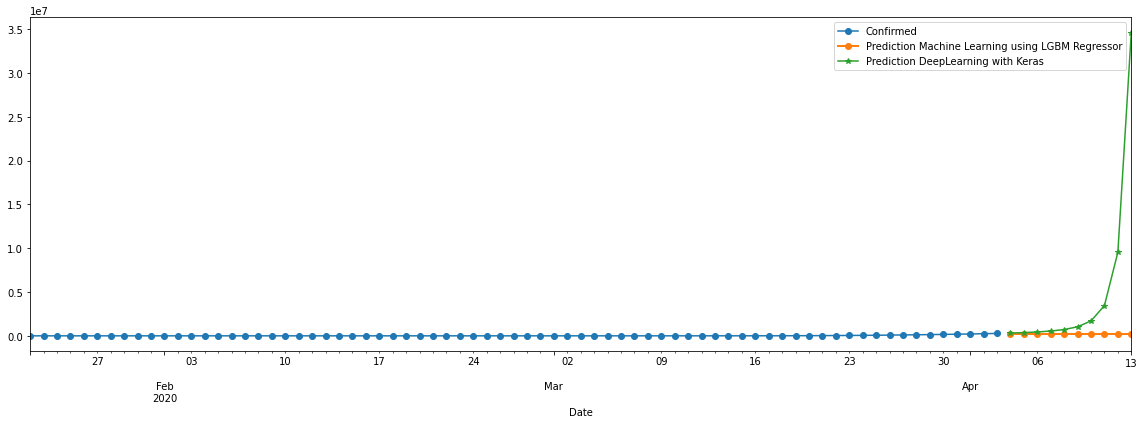

In [31]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(16,6))

hist = history.set_index(['Date'])['Confirmed'].plot(ax=ax, marker='o')
preds.plot(ax=ax, marker='o', linewidth=2)
preds_keras.plot(ax=ax, marker='*')
plt.legend()
plt.tight_layout()


Date
2020-02-04       1.0
2020-02-05       1.0
2020-02-06       1.0
2020-02-07       1.0
2020-02-08       1.0
2020-02-09       1.0
2020-02-10       1.0
2020-02-11       1.0
2020-02-12       1.0
2020-02-13       1.0
2020-02-14       1.0
2020-02-15       1.0
2020-02-16       1.0
2020-02-17       1.0
2020-02-18       1.0
2020-02-19       1.0
2020-02-20       1.0
2020-02-21       1.0
2020-02-22       1.0
2020-02-23       1.0
2020-02-24       1.0
2020-02-25       1.0
2020-02-26       1.0
2020-02-27       1.0
2020-02-28       1.0
2020-02-29       1.0
2020-03-01       2.0
2020-03-02       8.0
2020-03-03      13.0
2020-03-04      23.0
2020-03-05      50.0
2020-03-06     109.0
2020-03-07     169.0
2020-03-08     200.0
2020-03-09     239.0
2020-03-10     267.0
2020-03-11     314.0
2020-03-12     314.0
2020-03-13     559.0
2020-03-14     689.0
2020-03-15     886.0
2020-03-16    1058.0
2020-03-17    1243.0
2020-03-18    1486.0
2020-03-19    1795.0
2020-03-20    2257.0
2020-03-21    2815.0
2020-03-